In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pingouin as pg
import seaborn as sns
plt.style.use('ggplot')

In [8]:
overall_data = pd.read_excel('~/github/gal/Analyzing-Medicare-Expansion/data2/HEALTH DATA Adopted.xlsx')

In [9]:
overall_data.describe()

,Heart Disease Death Rate,Cancer Death Rate,"% Adults, Poor Health","% Adults, Poor Mental Health","% Adults, No care due to cost","% Adults, Trouble Paying Medical Bills",% Adults Uninsured
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,160.216129,149.696774,0.175871,0.230574,0.113372,0.271387,0.066968
std,27.272063,14.325862,0.034359,0.024872,0.021276,0.061048,0.021851
min,119.000000,123.500000,0.134000,0.189000,0.073460,0.149000,0.027210
25%,138.050000,141.000000,0.146000,0.214850,0.100415,0.237500,0.053172
50%,159.100000,146.500000,0.170000,0.224400,0.112340,0.265000,0.064757
75%,178.400000,158.000000,0.192500,0.249300,0.128255,0.321500,0.078205
max,217.400000,181.600000,0.263000,0.290900,0.149100,0.390000,0.120369


p-val is the p-value of the test. (p <.05 - columns are correlated) The general rule is that you can reject the hypothesis that the two variables are not correlated if the p-value is below 0.05.

In [10]:
pg.pairwise_corr(overall_data).sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']]

,X,Y,n,r,p-unc
0,Heart Disease Death Rate,Cancer Death Rate,31,0.785102,1.699069e-07
11,"% Adults, Poor Health","% Adults, Poor Mental Health",31,0.774742,3.127910e-07
9,Cancer Death Rate,"% Adults, Trouble Paying Medical Bills",31,0.754001,9.693993e-07
12,"% Adults, Poor Health","% Adults, No care due to cost",31,0.728752,3.339822e-06
7,Cancer Death Rate,"% Adults, Poor Mental Health",31,0.720563,4.847309e-06
1,Heart Disease Death Rate,"% Adults, Poor Health",31,0.715539,6.053345e-06
19,"% Adults, No care due to cost",% Adults Uninsured,31,0.689767,1.765786e-05
16,"% Adults, Poor Mental Health","% Adults, Trouble Paying Medical Bills",31,0.656561,6.041041e-05
4,Heart Disease Death Rate,"% Adults, Trouble Paying Medical Bills",31,0.634857,1.249315e-04
6,Cancer Death Rate,"% Adults, Poor Health",31,0.620829,1.941714e-04


In [11]:
overall_data.corr().round(2)

,Heart Disease Death Rate,Cancer Death Rate,"% Adults, Poor Health","% Adults, Poor Mental Health","% Adults, No care due to cost","% Adults, Trouble Paying Medical Bills",% Adults Uninsured
Heart Disease Death Rate,1.00,0.79,0.72,0.61,0.45,0.63,0.11
Cancer Death Rate,0.79,1.00,0.62,0.72,0.32,0.75,-0.09
"% Adults, Poor Health",0.72,0.62,1.00,0.77,0.73,0.51,0.32
"% Adults, Poor Mental Health",0.61,0.72,0.77,1.00,0.59,0.66,0.13
"% Adults, No care due to cost",0.45,0.32,0.73,0.59,1.00,0.48,0.69
"% Adults, Trouble Paying Medical Bills",0.63,0.75,0.51,0.66,0.48,1.00,0.28
% Adults Uninsured,0.11,-0.09,0.32,0.13,0.69,0.28,1.00


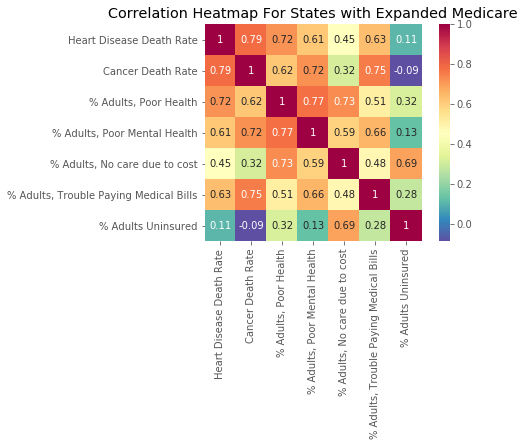

In [14]:
corrs = overall_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True, annot = True)


plt.title('Correlation Heatmap For States with Expanded Medicare')
plt.savefig('Heatmap_expanded.png')

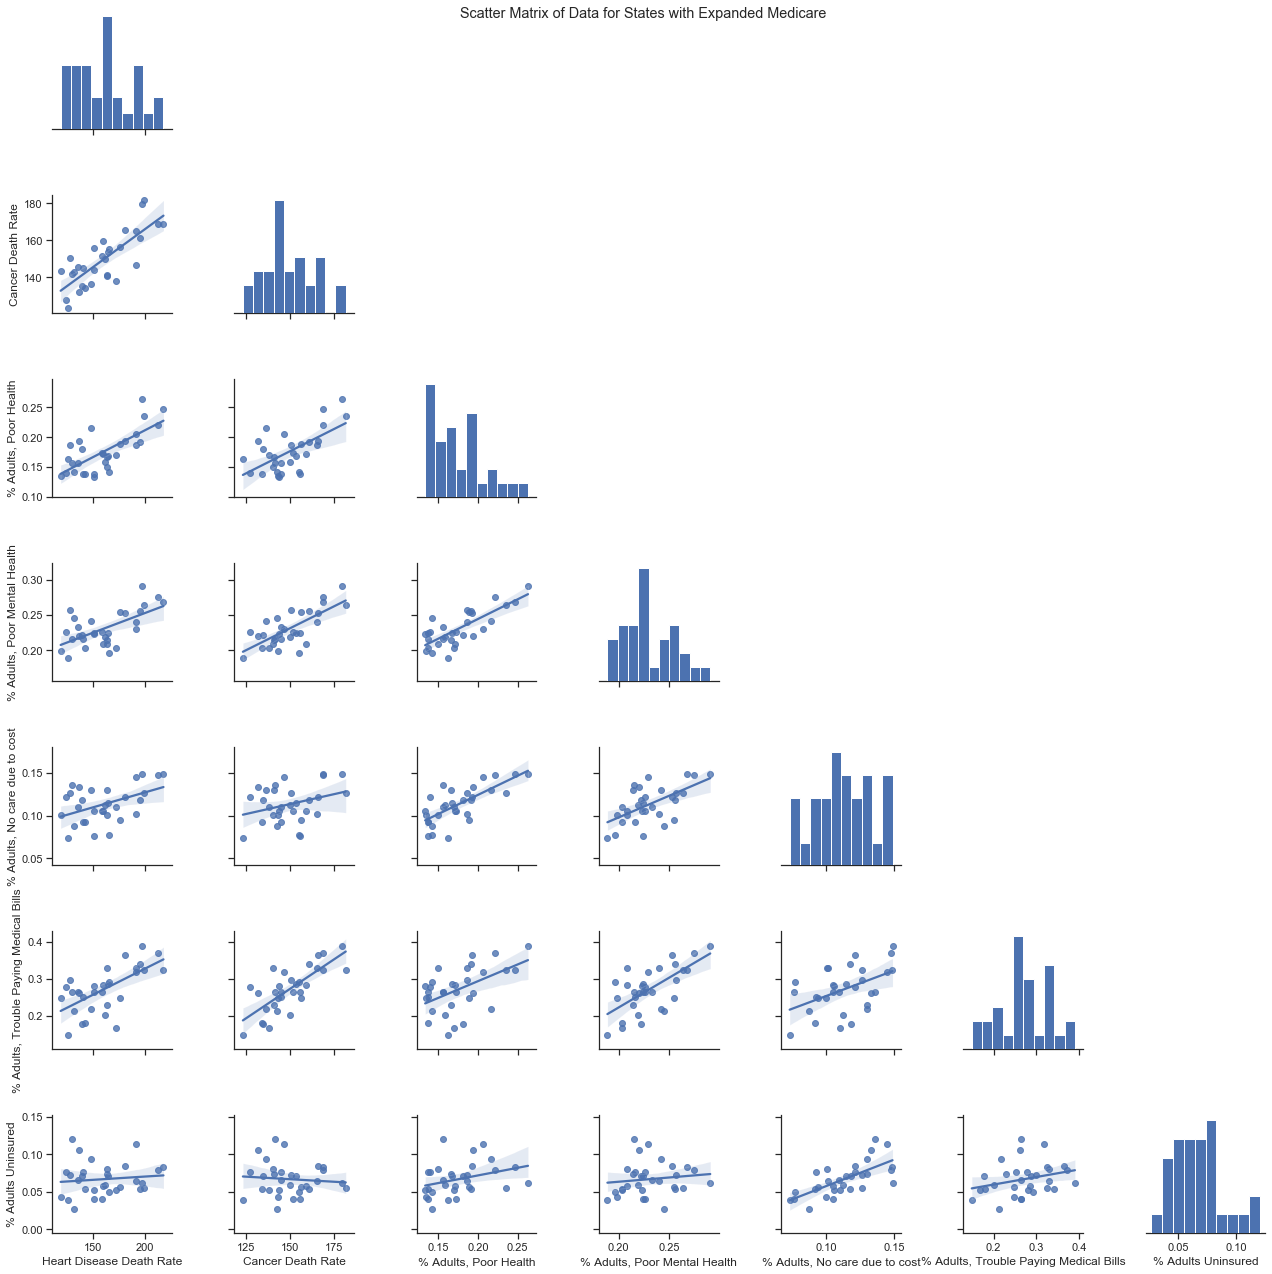

In [15]:
import seaborn as sns
sns.set(style="ticks")

g = sns.pairplot(overall_data, kind = 'reg', corner=True)
g.fig.suptitle("Scatter Matrix of Data for States with Expanded Medicare", y=1)
plt.savefig('Scatter_Matrix_expanded.png')